In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit

train_data = pd.read_table("mediaeval-2015-trainingset.txt") 
#read_table function reads general delimited file into DataFrame. 
#Thus, i don't need to create dataframe via 'pandas.DataFrame'

#repeat for test data
test_data = pd.read_table("mediaeval-2015-testset.txt")

train_data.head() #prints 1st four rows of data frame.

train_data.info() #prints metadata of train_data's data frame. 

train_data.shape #size of train_data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


(14277, 7)

In [82]:
#viewing the training set

train_data

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" http://t.co/41jUweux REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy http://t.co/PTdAXABZ",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish http: \/\/t.co\/pyHcJn0jwA,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake
14273,443086239127076865,New Species of Fish found in Brazil or just Really good Photoshop??? What You Think? ������������ http: \/\/t.co\/a6bG8mWcUs,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\/4Bml62OD15,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce maiale ???? http: \/\/t.co\/hQzWGhyDef,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake


images
boston                 546
bringback              131
columbianChemicals     185
elephant                13
livr                     9
malaysia               501
passport                46
pigFish                 14
sandyA                9695
sandyB                2621
sochi                  402
underwater             112
Name: tweetId, dtype: int64


Text(0, 0.5, 'Frequency of mentions')

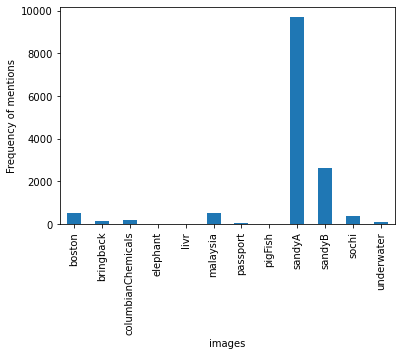

In [83]:
#rnd represents 'renamed data' dataframe
    
train_rnd = train_data.rename(columns = {'imageId(s)': 'images'})

#Print list of events that the renamed training data frame has and each event's corresponding frequency 
#this is done by splitting the imageIDs via underscore and returning the first element of the string i.e. the event name

#note that 'nunique' func = no. of unqiue values so that duplicates are not counted and so won't misrepresent the data.

count_train_event = train_rnd.groupby(train_rnd.images.str.split('_').str[0])['tweetId'].nunique()

print(count_train_event)

#plotting bar chart of Frequency of mentions 

%matplotlib inline

count_train_event.plot(kind='bar')

plt.ylabel("Frequency of mentions")

fake     6742
real     4921
humor    2614
Name: label, dtype: int64


Text(0, 0.5, 'No. of Tweets')

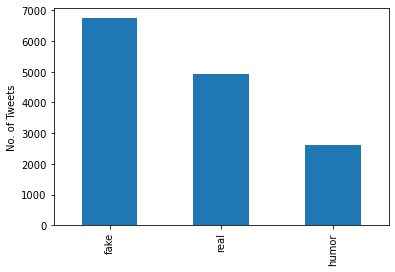

In [84]:
#value counting labels for training data
count_label = train_rnd.label.value_counts()

print(count_label)

#plot bar chart of label count
%matplotlib inline

count_label.plot(kind='bar')
plt.ylabel("No. of Tweets")


images
eclipse        277
garissa         77
nepal         1353
samurai        218
syrianboy     1769
varoufakis      61
Name: tweetId, dtype: int64


Text(0.5, 1.0, 'Test Data')

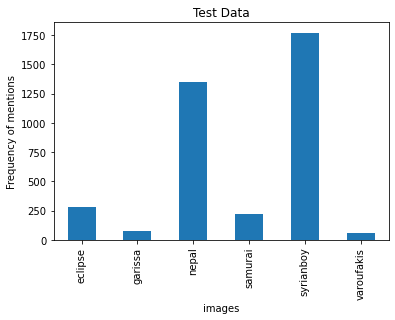

In [85]:
#Repeat same functions descibed in previous two cells for the test data frame
test_rnd = test_data.rename(columns = {'imageId(s)': 'images'})

count_test_event = test_rnd.groupby(test_rnd.images.str.split('_').str[0])['tweetId'].nunique()
print(count_test_event)
                         
%matplotlib inline

count_test_event.plot(kind='bar')   
plt.ylabel("Frequency of mentions")
plt.title("Test Data")

fake    2546
real    1209
Name: label, dtype: int64


Text(0, 0.5, 'No. of Tweets')

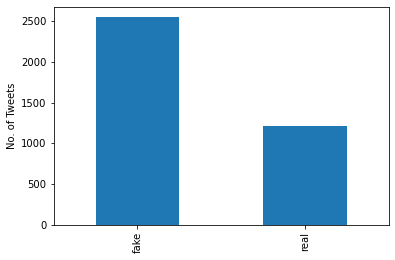

In [86]:
#count label with test set

#value counting labels for training data
count_label_test = test_rnd.label.value_counts()

print(count_label_test)

%matplotlib inline

count_label_test.plot(kind='bar')
plt.ylabel("No. of Tweets")

In [87]:
#Change humor labels to be classified as fakes 
train_rnd.loc[(train_rnd.label == 'humor'),'label'] = 'fake'

#no need to convert labels as test data doesn't contain 'humour' labels


In [88]:
#double checking that all humor labels have been converted to fakes in train sets
train_rnd.label.value_counts()



fake    9356
real    4921
Name: label, dtype: int64

In [89]:
#print label count of test data so I can compare the label counts between the training and test set 
test_rnd.label.value_counts()

fake    2546
real    1209
Name: label, dtype: int64

In [90]:
#initial clean of training data 

# Removing duplicated tweets
train_rnd.drop_duplicates(subset={'tweetText'}, inplace=True)

# Removing tweets with missing indices.
train_rnd.dropna()

#checking size of data frame - was (14277, 7) at the start -> now (12376, 7)
train_rnd.shape



(12376, 7)

In [91]:
#test set shape before cleaning
print(test_rnd.shape)

#Repeat initial clean for test

# Removing duplicated tweets
test_rnd.drop_duplicates(subset={'tweetText'}, inplace=True)

# Removing tweets with missing indices.
test_rnd.dropna()

#checking size of data frame - was (14277, 7) at the start -> now (12376, 7)
print(test_rnd.shape)

(3755, 7)
(3706, 7)


In [92]:
#compare label counts of training and test set after initial cleaning
print(train_rnd.label.value_counts())
print(test_rnd.label.value_counts())


fake    8597
real    3779
Name: label, dtype: int64
fake    2507
real    1199
Name: label, dtype: int64


In [93]:
import re

def multi_clean(t):
    # Covert all letters to small caps (existing python func)
    t = t.lower()
    
    #Removal of twitter handles as this info doesn't provide value to the model 
    t = re.sub(r'@\w*', "", t)
    
    # Match and sebsequently replace non-ASCII unicode characters, usful for replacing e.g. @,#, '', etc.
    t = re.sub("[^a-zA-Z ]+", "", t)
    
    # Remove urls from tweetTexts
    t = re.sub(r'http\S+', '', t)

    return t

# Applying basic preprocessing to train_data and test_Data
train_rnd['cleanedTrain'] = train_rnd['tweetText'].apply(multi_clean)

#displaying data with a wider column width to make it easier to spot if the cleaning processes work

pd.options.display.max_colwidth = 100

train_rnd[['cleanedTrain']].head(50)


,cleanedTrain
0,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn s...
1,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt
2,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy
3,scary shit hurricane ny
4,my fave place in the world nyc hurricane sandy statueofliberty
5,nd time square nyc subway hurricane
6,just in time for halloween a photo of hurricane sandy frankenstorm
7,crazy pic of hurricane sandy prayers go out to family and friends on the east coast
8,sandy newyork hurricane statueofliberty usa
9,nyc hurricane


In [94]:
#Same multi_clean operations for test set
test_rnd['cleanedTest'] = test_rnd['tweetText'].apply(multi_clean)

test_rnd.head()

,tweetId,tweetText,userId,images,username,timestamp,label,cleanedTest
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,kereeen rt eclipse from iss
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,absolutely beautiful rt eclipse from iss
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,eclipse from iss wow amazing
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,eclipse from iss
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine ...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,clipse vue de liss autre chose cration divine na pas de limite


In [95]:
#Removing emojis (UNICODE for emojis e.g. emotion, symbols, pictographs, transport, map and flag emojis)
#Source: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python/49146722#49146722

#some academic papers use emojis for sentiment analysis but I have justified why I am removing the emojis in the report

def clean_emoji(t):
    pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return pattern.sub(r'', t)

train_rnd['wo emojis'] = train_rnd['cleanedTrain'].apply(clean_emoji)

In [96]:
#repeat for test data
test_rnd['wo emojis'] = test_rnd['cleanedTest'].apply(clean_emoji)

In [97]:
#print a wider column to check if data is cleaned properly

pd.options.display.max_colwidth = 500

train_rnd[['wo emojis']].head(50)

,wo emojis
0,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn sandy
1,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt
2,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy
3,scary shit hurricane ny
4,my fave place in the world nyc hurricane sandy statueofliberty
5,nd time square nyc subway hurricane
6,just in time for halloween a photo of hurricane sandy frankenstorm
7,crazy pic of hurricane sandy prayers go out to family and friends on the east coast
8,sandy newyork hurricane statueofliberty usa
9,nyc hurricane


In [98]:
pd.options.display.max_colwidth = 500

test_rnd[['wo emojis']].head(50)

,wo emojis
0,kereeen rt eclipse from iss
1,absolutely beautiful rt eclipse from iss
2,eclipse from iss wow amazing
3,eclipse from iss
4,clipse vue de liss autre chose cration divine na pas de limite
5,clipse vue de liss autre chose
6,clipse vue de liss autre chose
8,dit dus rt the solar eclipse seen from international space station solareclipse iss space
9,photo the solar eclipse as seen from the international space station solareclipse iss space
10,a solar eclipse viewed from the iss cool eclipse from iss


In [99]:
train_rnd

,tweetId,tweetText,userId,images,username,timestamp,label,cleanedTrain,wo emojis
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn sandy,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn sandy
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" http://t.co/41jUweux REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy http://t.co/PTdAXABZ",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my fave place in the world nyc hurricane sandy statueofliberty,my fave place in the world nyc hurricane sandy statueofliberty
...,...,...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish http: \/\/t.co\/pyHcJn0jwA,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake,slaps tweetdeck with the pigfish http tcopyhcjnjwa,slaps tweetdeck with the pigfish http tcopyhcjnjwa
14273,443086239127076865,New Species of Fish found in Brazil or just Really good Photoshop??? What You Think? ������������ http: \/\/t.co\/a6bG8mWcUs,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake,new species of fish found in brazil or just really good photoshop what you think http tcoabgmwcus,new species of fish found in brazil or just really good photoshop what you think http tcoabgmwcus
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\/4Bml62OD15,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake,what do we call this pigfish http tcobmlod,what do we call this pigfish http tcobmlod
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce maiale ???? http: \/\/t.co\/hQzWGhyDef,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake,pigfish e dopo il pescecane c il pesce maiale http tcohqzwghydef,pigfish e dopo il pescecane c il pesce maiale http tcohqzwghydef


In [100]:
###translating foreign languages to english NOT used for final implementation due to decrease in micro F1-score
###from googletrans import Translator

###def gtranslate(text):
###    return Translator().translate(text)

###train_rnd['translated'] = train_rnd['wo emojis'].apply(gtranslate)

###train_rnd[['wo emojis','translated']].head(20)

In [101]:
###stopwords NOT used for final implementation due to decrease in micro F1-score
###import nltk 

###initialisation of bag of stopwords 
###stopwords = nltk.corpus.stopwords.words()

###Removing stopwords in tweets

###train_rnd['stop_filter'] = train_rnd['translated'].apply(lambda t: ' '.join([w for w in t.split() if w not in stopwords]))

###train_rnd[['translated','stop_filter']].head(20)

In [102]:
### stemming NOT used for final implementation due to decrease in micro F1-score
###from nltk.tokenize import word_tokenize
###from nltk.stem import PorterStemmer

###pstm = PorterStemmer()

###train_rnd['stem'] = train_rnd['stop_filter'].apply(lambda t: ' '.join([pstm.stem(w) for w in word_tokenize(t)]))


In [103]:
#train_rnd['stem'].head()

In [104]:
train_rnd

,tweetId,tweetText,userId,images,username,timestamp,label,cleanedTrain,wo emojis
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn sandy,se acuerdan de la pelcula el da despus de maana me recuerda a lo que est pasando con el huracn sandy
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" http://t.co/41jUweux REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt,miren a sandy en ny tremenda imagen del huracn parece el da de la independencia real rt
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy http://t.co/PTdAXABZ",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy,buena la foto del huracn sandy me recuerda a la pelcula da de la independencia id sandy
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my fave place in the world nyc hurricane sandy statueofliberty,my fave place in the world nyc hurricane sandy statueofliberty
...,...,...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish http: \/\/t.co\/pyHcJn0jwA,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake,slaps tweetdeck with the pigfish http tcopyhcjnjwa,slaps tweetdeck with the pigfish http tcopyhcjnjwa
14273,443086239127076865,New Species of Fish found in Brazil or just Really good Photoshop??? What You Think? ������������ http: \/\/t.co\/a6bG8mWcUs,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake,new species of fish found in brazil or just really good photoshop what you think http tcoabgmwcus,new species of fish found in brazil or just really good photoshop what you think http tcoabgmwcus
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\/4Bml62OD15,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake,what do we call this pigfish http tcobmlod,what do we call this pigfish http tcobmlod
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce maiale ???? http: \/\/t.co\/hQzWGhyDef,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake,pigfish e dopo il pescecane c il pesce maiale http tcohqzwghydef,pigfish e dopo il pescecane c il pesce maiale http tcohqzwghydef


In [105]:
test_rnd

,tweetId,tweetText,userId,images,username,timestamp,label,cleanedTest,wo emojis
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... http://t.co/je2hcFpVfN,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,kereeen rt eclipse from iss,kereeen rt eclipse from iss
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS.... http://t.co/oqwtTL0ThS,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,absolutely beautiful rt eclipse from iss,absolutely beautiful rt eclipse from iss
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C0VfboScRj” 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,eclipse from iss wow amazing,eclipse from iss wow amazing
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,eclipse from iss,eclipse from iss
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... http://t.co/yNBN7c4O51\n\nLa création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,clipse vue de liss autre chose cration divine na pas de limite,clipse vue de liss autre chose cration divine na pas de limite
...,...,...,...,...,...,...,...,...,...
3750,578433150071775232,Un présentateur de la ZDF confesse avoir truqué la vidéo du doigt de Varoufakis à l'Allemagne #satire http://t.co/FTVpMv6IUK via @lalibrebe,257551211,varoufakis_1,Cdt_Sylvestre,Thu Mar 19 05:49:44 +0000 2015,fake,un prsentateur de la zdf confesse avoir truqu la vido du doigt de varoufakis lallemagne satire via,un prsentateur de la zdf confesse avoir truqu la vido du doigt de varoufakis lallemagne satire via
3751,578433646597656576,"Oh les kleine menteurs ""@CorineBarella: Un présentateur ZDF confesse avoir truqué vidéo du doigt de Varoufakis http://t.co/7lEkEZgjOY""",27575883,varoufakis_1,damomarc,Thu Mar 19 05:51:42 +0000 2015,fake,oh les kleine menteurs un prsentateur zdf confesse avoir truqu vido du doigt de varoufakis,oh les kleine menteurs un prsentateur zdf confesse avoir truqu vido du doigt de varoufakis
3752,578486910491996160,Este es el programa de ZDF en el que confirman que el video de Varoufakis es un montaje https://t.co/MJa3aoRBIy,2049211,varoufakis_1,javierpascual,Thu Mar 19 09:23:21 +0000 2015,fake,este es el programa de zdf en el que confirman que el video de varoufakis es un montaje,este es el programa de zdf en el que confirman que el video de varoufakis es un montaje
3753,578505023912591360,11.34 - wir haben FAST Mittag ▶ Riesen Verwirrung um Varoufakis-Video ZDF-Comedian Jan Böhmermann ▶ http://t.co/rRLu2cfWcB,262222386,varoufakis_1,aotto1968_2,Thu Mar 19 10:35:20 +0000 2015,fake,wir haben fast mittag riesen verwirrung um varoufakisvideo zdfcomedian jan bhmermann,wir haben fast mittag riesen verwirrung um varoufakisvideo zdfcomedian jan bhmermann


In [108]:
# MNB implementation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pip_1 = Pipeline([
    ('vec', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('class', MultinomialNB())
])

mnb_mod = pip_1.fit(train_rnd['wo emojis'], train_rnd['label'])
mnb_pred = mnb_mod.predict(test_rnd['wo emojis'])

In [109]:
#SGD implementation
from sklearn.linear_model import SGDClassifier

pip_2 = Pipeline([
    ('vec', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('class', SGDClassifier())
])

sgd_mod = pip_2.fit(train_rnd['wo emojis'], train_rnd['label'])
sgd_pred = sgd_mod.predict(test_rnd['wo emojis'])

In [110]:
#SVC implementation

from sklearn.svm import LinearSVC

pip_3 = Pipeline([
    ('vec', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('class', LinearSVC())
])

svc_mod = pip_3.fit(train_rnd['wo emojis'], train_rnd['label'])
svc_pred = svc_mod.predict(test_rnd['wo emojis'])

0.20561059999999998

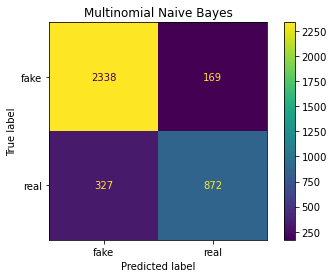

In [111]:
#Plot confusion matrix for MNB

tic=timeit.default_timer()

plot_confusion_matrix(mnb_mod, test_rnd['wo emojis'], test_rnd['label'])
plt.title("Multinomial Naive Bayes")

#printing computation duration
toc=timeit.default_timer()
toc - tic


0.20098649999999907

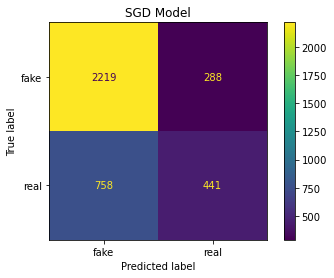

In [112]:
#matrix of SGD

tic=timeit.default_timer()

plot_confusion_matrix(sgd_mod, test_rnd['wo emojis'], test_rnd['label'])
plt.title("SGD Model")

toc=timeit.default_timer()
toc - tic


0.26984149999952933

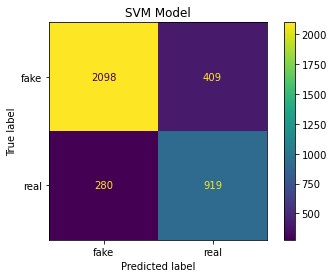

In [113]:
#matrix of SVC

tic=timeit.default_timer()

plot_confusion_matrix(svc_mod, test_rnd['wo emojis'], test_rnd['label'])
plt.title("SVM Model")

toc=timeit.default_timer()
toc - tic

In [114]:
test = test_rnd['label']

In [115]:
#print values from classification_report 
#results from MNB

from sklearn.metrics import classification_report

print(classification_report(test, mnb_pred))

              precision    recall  f1-score   support

        fake       0.88      0.93      0.90      2507
        real       0.84      0.73      0.78      1199

    accuracy                           0.87      3706
   macro avg       0.86      0.83      0.84      3706
weighted avg       0.86      0.87      0.86      3706



In [116]:
#results from sgd

print(classification_report(test, sgd_pred))

              precision    recall  f1-score   support

        fake       0.75      0.89      0.81      2507
        real       0.60      0.37      0.46      1199

    accuracy                           0.72      3706
   macro avg       0.68      0.63      0.63      3706
weighted avg       0.70      0.72      0.70      3706



In [117]:
#results from svc

print(classification_report(test, svc_pred))

              precision    recall  f1-score   support

        fake       0.88      0.84      0.86      2507
        real       0.69      0.77      0.73      1199

    accuracy                           0.81      3706
   macro avg       0.79      0.80      0.79      3706
weighted avg       0.82      0.81      0.82      3706



In [118]:
#printing micro-f1 scores
from sklearn.metrics import f1_score 

#micro f1 for MNB
print(f1_score(test, mnb_pred, average='micro'))

#micro f1 for SGD
print(f1_score(test, sgd_pred, average='micro'))

#micro f1 for SVC
print(f1_score(test, svc_pred, average='micro'))

0.8661629789530491
0.7177549919050189
0.8140852671343768


In [120]:
#sgd hyper tuning with the use of the GridSearch Method
from sklearn.model_selection import GridSearchCV

tic=timeit.default_timer()

parameters = {
    
    "vec__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    "class__alpha": (0.00001, 0.000001),   
}

gs_clf = GridSearchCV(pip_2, param_grid= parameters, cv=10,  scoring='roc_auc', n_jobs=-1)
gs_clf = gs_clf.fit(train_rnd['wo emojis'], train_rnd['label'])

print(gs_clf.best_score_)
print(gs_clf.best_estimator_)

toc=timeit.default_timer()
toc - tic

0.8215325435480011
Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('class', SGDClassifier(alpha=1e-05))])


20.583760899999106